### Description

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random as python_random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from numpy import loadtxt
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.metrics import f1_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn import datasets

In [ ]:
data=datasets.load_breast_cancer()
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=pd.Series(data.target)

In [ ]:
df.shape

(569, 31)

In [ ]:
df.head(n=10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## Exploratory Data Analysis with original 31 features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8861816d50>,
      dtype=object)

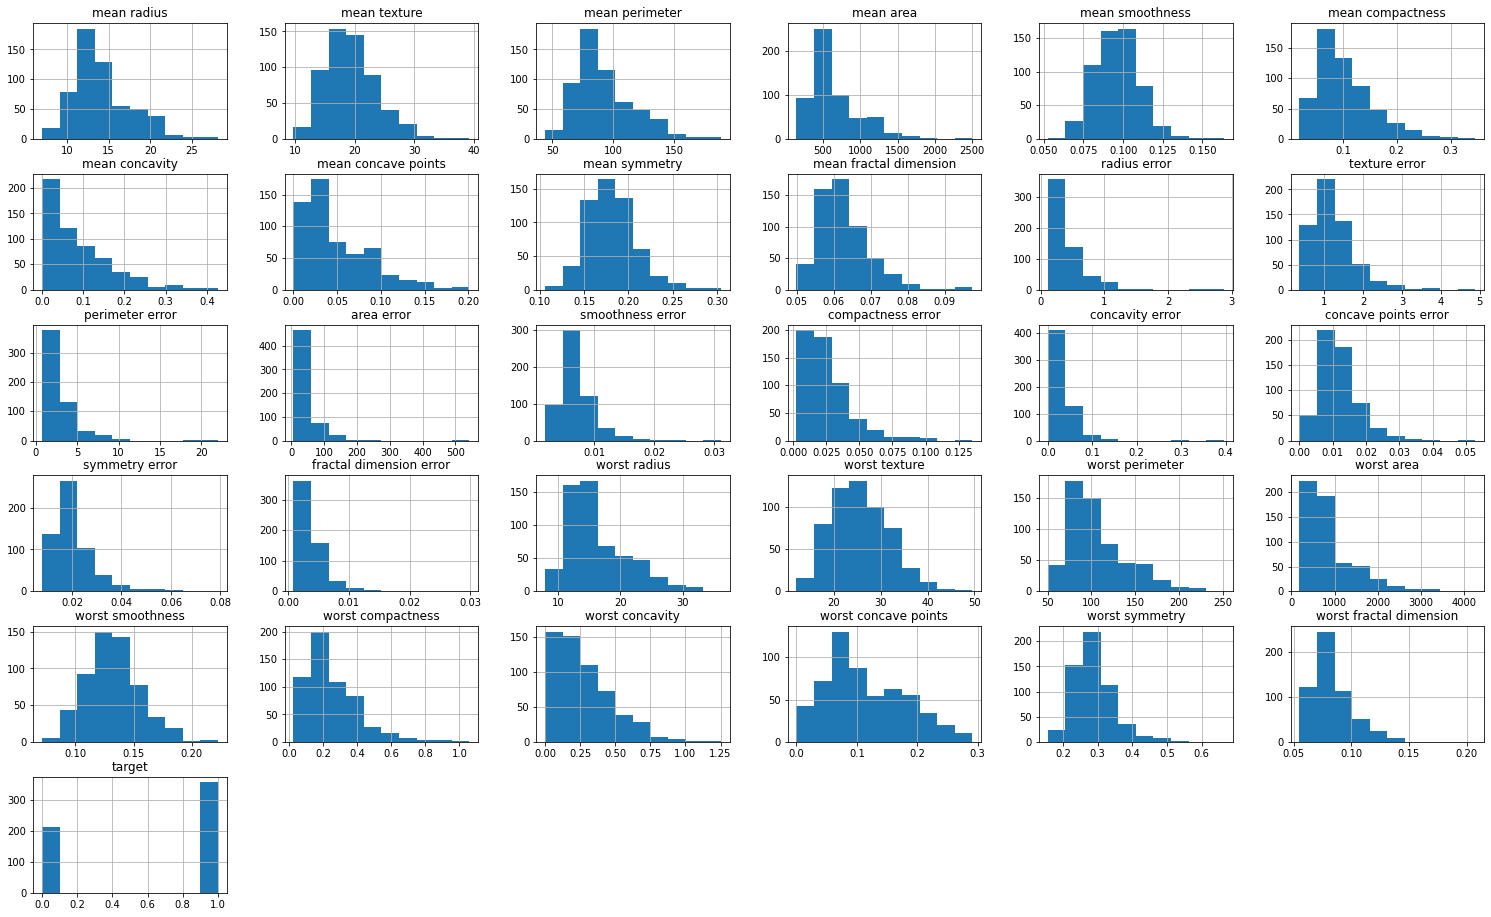

In [ ]:
df.hist(figsize=(26,16))

In [ ]:
X=df.iloc[:,0:30]

In [ ]:
y=df.iloc[:,30]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(len(X_train))

455


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))
predsvm=svm.predict(X_test)


0.9824561403508771


In [ ]:
print(f1_score(y_test,predsvm))

0.9852941176470589


In [ ]:
matrix=confusion_matrix(y_test,predsvm,labels=[1,0])
confusion=pd.DataFrame(matrix,index=['Actual Cancer','Actual No Cancer'],columns=['Predicted Cancer','Predicted No Cancer'])
print(confusion)

                  Predicted Cancer  Predicted No Cancer
Actual Cancer                   67                    0
Actual No Cancer                 2                   45


## Feature Selection using Chi-square test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features=SelectKBest(score_func=chi2,k=10)
fit=chi2_features.fit(X,y)



In [ ]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']

In [ ]:
featureScores

,Specs,Score
0,mean radius,266.104917
1,mean texture,93.897508
2,mean perimeter,2011.102864
3,mean area,53991.655924
4,mean smoothness,0.149899
5,mean compactness,5.403075
6,mean concavity,19.712354
7,mean concave points,10.544035
8,mean symmetry,0.257380
9,mean fractal dimension,0.000074


In [ ]:
print(featureScores.nlargest(10,'Score'))

              Specs          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508


In [ ]:
Xnew=df[['worst area','mean area','worst perimeter','worst radius','mean perimeter','area error','mean radius','perimeter error','worst texture','mean texture']]
chidf=pd.concat([Xnew,df['target']],axis=1)

chidf.head(n=10)

,worst area,mean area,worst perimeter,worst radius,mean perimeter,area error,mean radius,perimeter error,worst texture,mean texture,target
0,2019.0,1001.0,184.60,25.38,122.80,153.40,17.99,8.589,17.33,10.38,0
1,1956.0,1326.0,158.80,24.99,132.90,74.08,20.57,3.398,23.41,17.77,0
2,1709.0,1203.0,152.50,23.57,130.00,94.03,19.69,4.585,25.53,21.25,0
3,567.7,386.1,98.87,14.91,77.58,27.23,11.42,3.445,26.50,20.38,0
4,1575.0,1297.0,152.20,22.54,135.10,94.44,20.29,5.438,16.67,14.34,0
5,741.6,477.1,103.40,15.47,82.57,27.19,12.45,2.217,23.75,15.70,0
6,1606.0,1040.0,153.20,22.88,119.60,53.91,18.25,3.180,27.66,19.98,0
7,897.0,577.9,110.60,17.06,90.20,50.96,13.71,3.856,28.14,20.83,0
8,739.3,519.8,106.20,15.49,87.50,24.32,13.00,2.406,30.73,21.82,0
9,711.4,475.9,97.65,15.09,83.97,23.94,12.46,2.039,40.68,24.04,0


## EDA with new 10 independet features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88a4a13810>,
      dtype=object)

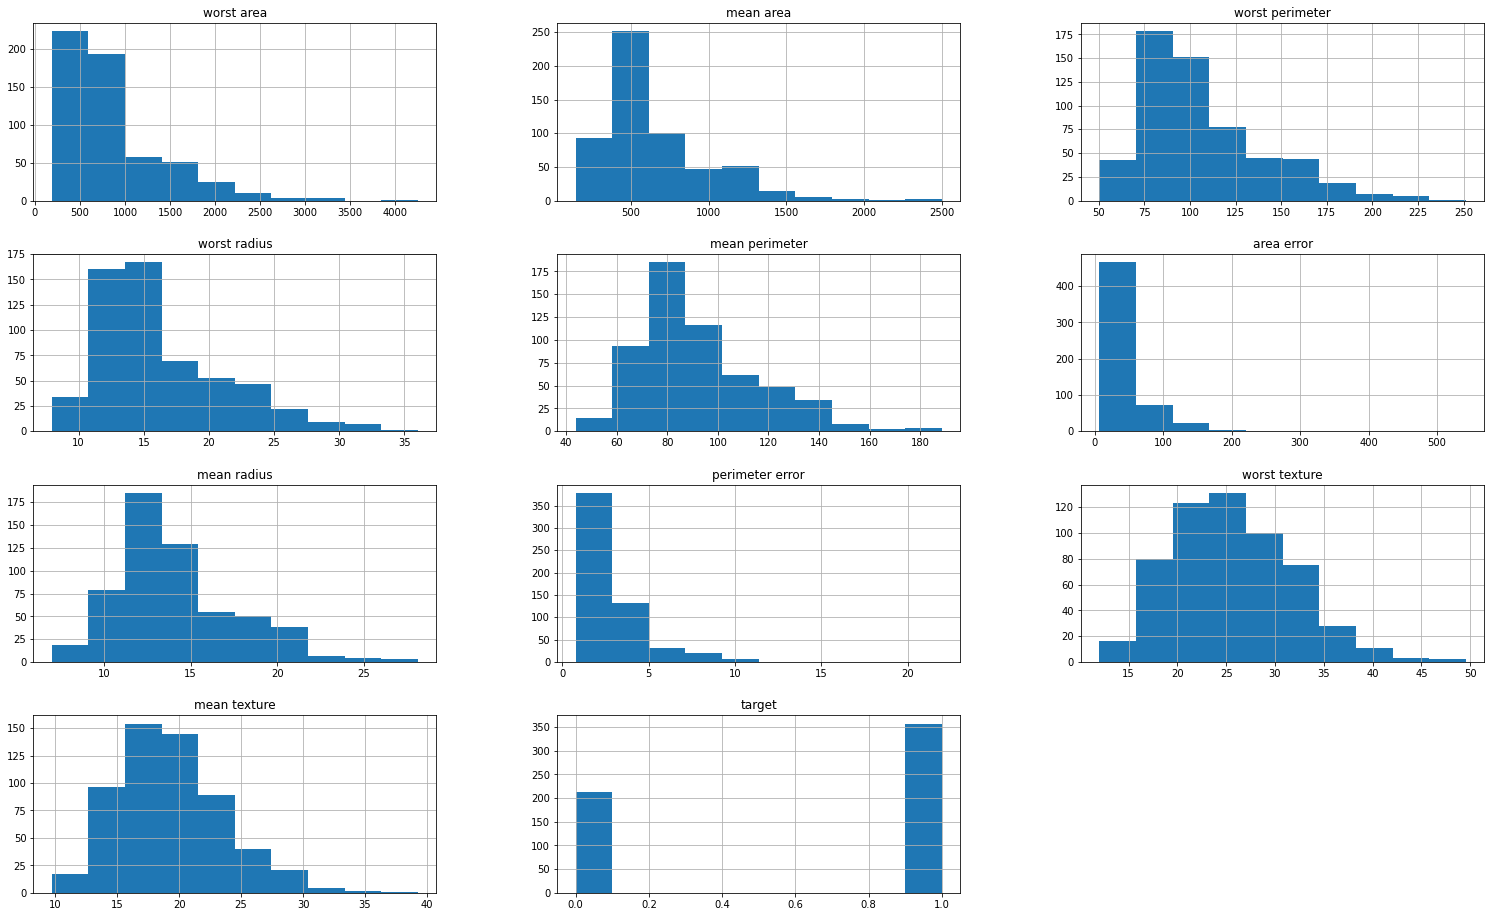

In [ ]:
chidf.hist(figsize=(26,16))

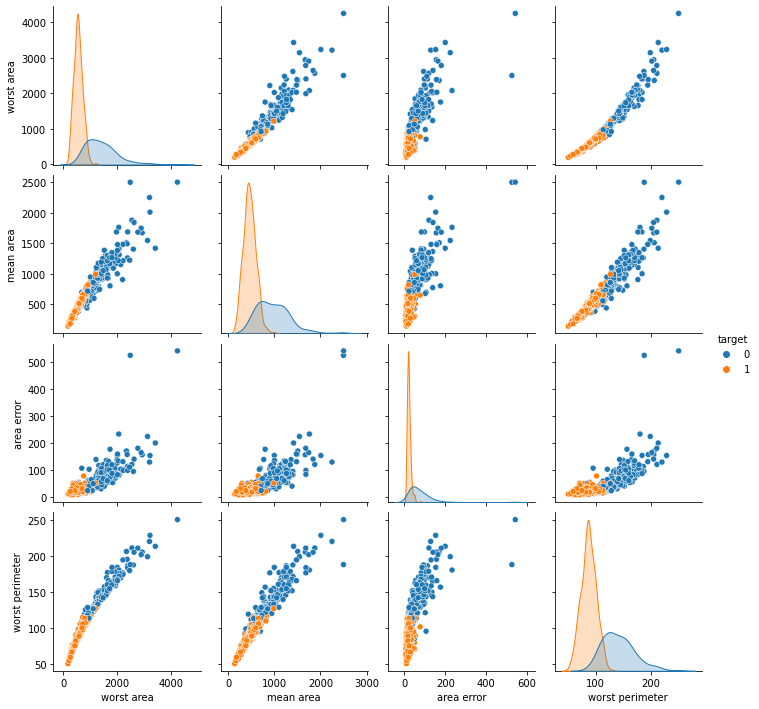

In [ ]:
sns.pairplot(chidf,hue='target',vars=['worst area','mean area','area error','worst perimeter'])

In [ ]:
X_train_chi,X_test_chi,y_train,y_test=train_test_split(Xnew,y,test_size=0.2,random_state=0)

In [ ]:
scaler=StandardScaler()
X_train_chi=scaler.fit_transform(X_train_chi)
X_test_chi=scaler.transform(X_test_chi)



In [ ]:
svm=SVC()
svm.fit(X_train_chi,y_train)
pred=svm.predict(X_test_chi)
print(accuracy_score(y_test,pred))


0.9649122807017544


In [ ]:
print(f1_score(y_test,pred))

0.9701492537313433


In [ ]:
matrix=confusion_matrix(y_test,pred,labels=[1,0])
confusion=pd.DataFrame(matrix,index=['Actual Cancer','Actual No Cancer'],columns=['Predicted Cancer','Predicted No Cancer'])
print(confusion)

                  Predicted Cancer  Predicted No Cancer
Actual Cancer                   65                    2
Actual No Cancer                 2                   45


### ANN

In [ ]:
X_train_ann,X_test_ann,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
scaler=StandardScaler()
X_train_ann=scaler.fit_transform(X_train_ann)
X_test_ann=scaler.transform(X_test_ann)



In [ ]:
model=Sequential()
model.add(Dense(12,input_dim=30,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train_ann,y_train,epochs=50,batch_size=8)

Epoch 1/50
57/57 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.4308
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7231
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8945
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.9516
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9692
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9714
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9736
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9802
Epoch 9/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9780
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9802
Epoch 11/50
57/57 [

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                372       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
None


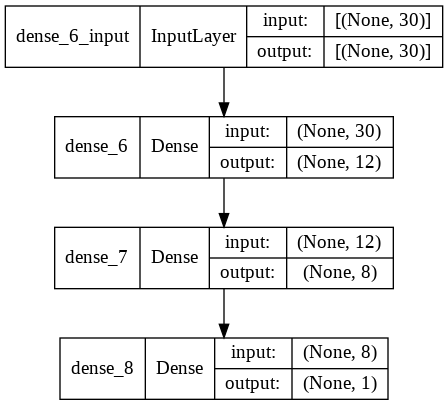

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
predann=(np.round(model.predict(X_test_ann)))

In [ ]:
print(accuracy_score(y_test,predann))

0.9649122807017544


In [ ]:
print(f1_score(y_test,predann))

0.9696969696969696


In [ ]:
matrix=confusion_matrix(y_test,predann,labels=[1,0])
confusion=pd.DataFrame(matrix,index=['Actual Cancer','Actual No Cancer'],columns=['Predicted Cancer','Predicted No Cancer'])
print(confusion)

                  Predicted Cancer  Predicted No Cancer
Actual Cancer                   64                    3
Actual No Cancer                 1                   46


In [ ]:
X_train_ann_chi,X_test_ann_chi,y_train,y_test=train_test_split(Xnew,y,test_size=0.2,random_state=0)

In [ ]:
scaler=StandardScaler()
X_train_ann_chi=scaler.fit_transform(X_train_chi)
X_test_ann_chi=scaler.transform(X_test_chi)



In [ ]:
model=Sequential()
model.add(Dense(4,input_dim=10,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_ann_chi,y_train,epochs=50,batch_size=8)

Epoch 1/50
57/57 [==============================] - 1s 3ms/step - loss: 0.6623 - accuracy: 0.6527
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.8132
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8659
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.9033
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.9099
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.9143
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.9275
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.9275
Epoch 9/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.9341
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.9407
Epoch 11/50
57/57 [

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 44        
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


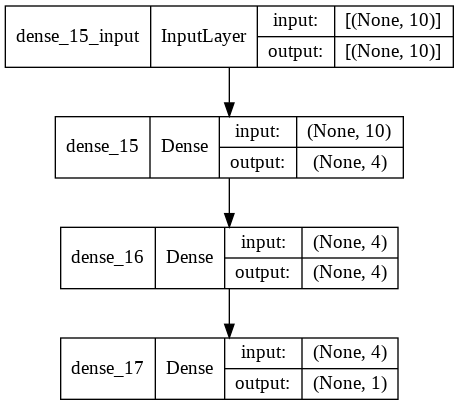

In [ ]:

plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)


In [ ]:
predannchi=(np.round(model.predict(X_test_ann_chi)))

In [ ]:
print(accuracy_score(y_test,predannchi))

0.9385964912280702


In [ ]:
print(f1_score(y_test,predannchi))

0.9465648854961832


In [ ]:
matrix=confusion_matrix(y_test,predannchi,labels=[1,0])
confusion=pd.DataFrame(matrix,index=['Actual Cancer','Actual No Cancer'],columns=['Predicted Cancer','Predicted No Cancer'])
print(confusion)

                  Predicted Cancer  Predicted No Cancer
Actual Cancer                   64                    3
Actual No Cancer                 4                   43


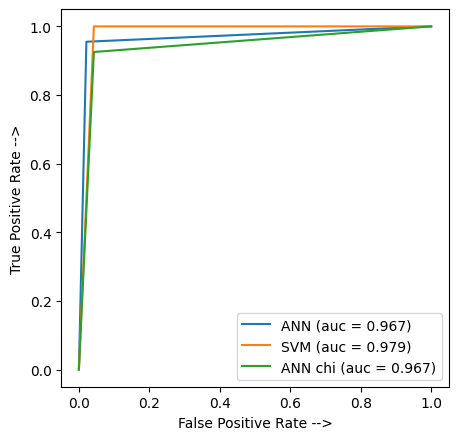

In [ ]:
from sklearn.metrics import roc_curve, auc
ann_fpr, ann_tpr, threshold = roc_curve(y_test, predann)
auc_ann = auc(ann_fpr, ann_tpr)
annchi_fpr, annchi_tpr, threshold = roc_curve(y_test, predannchi)
auc_annchi = auc(ann_fpr, ann_tpr)


svm_fpr, svm_tpr, threshold = roc_curve(y_test, predsvm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(ann_fpr, ann_tpr, linestyle='-', label='ANN (auc = %0.3f)' % auc_ann)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(annchi_fpr, annchi_tpr, linestyle='-', label='ANN chi (auc = %0.3f)' % auc_annchi)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()